In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../')  # Add the parent folder to the Python path

from sql_functions import clean_flights_table  # Import the function


In [2]:
flights_2015 = clean_flights_table(2015)
flights_2016 = clean_flights_table(2016)
flights_2017 = clean_flights_table(2017)

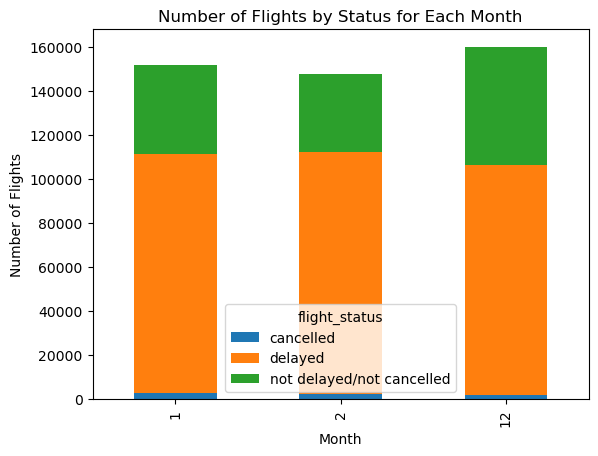

In [3]:
# plot to year of 2016

# Create a new column for the month
flights_2016['month'] = flights_2016['flight_date'].dt.month

# Function to map delayed and cancelled statuses to a single status
def flight_status(row):
    if row['cancelled'] == 1:
        return 'cancelled'
    elif row['had_delay'] == 1:
        return 'delayed'
    else:
        return 'not delayed/not cancelled'
    

# Apply the function to create a new column representing the combined status
flights_2016['flight_status'] = flights_2016.apply(flight_status, axis=1)

# Group by month and flight status, then count the number of flights for each group
flight_status_counts = flights_2016.groupby(['month', 'flight_status']).size().unstack(fill_value=0)

# Plot the counts for each flight status
flight_status_counts.plot(kind='bar', stacked=True)

# Add labels and title
plt.title('Number of Flights by Status for Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Flights')

# Show plot
plt.show()

